<a href="https://colab.research.google.com/github/gegebby/gegebby/blob/main/Ninda_Gebrina_Rizky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Homework Rakamin Trial Class - Mini Case

# Mengukur Performa Penjualan Ritel Online

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('online_retail_II.csv')

## Load Data

In [3]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


## Section 1

### Create New Feature: Year

In [4]:
df['Year'] = df['InvoiceDate']
df['Year'] = pd.to_datetime(df['Year'])
Year = df['Year'] = df['Year'].dt.strftime('%Y')

In [5]:
Year

0          2009
1          2009
2          2009
3          2009
4          2009
           ... 
1067366    2011
1067367    2011
1067368    2011
1067369    2011
1067370    2011
Name: Year, Length: 1067371, dtype: object

### Filtering Data

In [6]:
df[(df['Quantity']>0)& (df['Invoice']!= 'c')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


### Create New Feature: Revenue

In [7]:
df_akhir= df.assign(Revenue = df['Quantity']* df['Price'])

In [8]:
df_akhir

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.00
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,14.85


### Average of Revenue per Year

In [9]:
df_akhir['Revenue'].mean()

18.06986564933133

In [10]:
Mean = df_akhir.groupby('Year').mean()['Revenue'].reset_index()

In [11]:
Mean

,Year,Revenue
0,2009,17.684777
1,2010,18.152555
2,2011,18.018195


In [12]:
import matplotlib.pyplot as plt

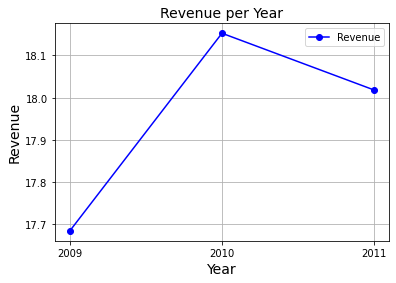

In [13]:

plt.plot(Mean['Year'], Mean['Revenue'], color='blue', marker='o', Label = 'Revenue')
plt.title('Revenue per Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

### Interpretation

Berdasarkan grafik diatas, didapatkan =
1. 'Revenue' atau pendapatan yang dihasilkan pada tahun 2009 hingga 2010 meningkat 2.645%, 
2. Pada tahun 2010 hingga 2011 mengalami penurunan -0.7401% dan,
3. Pendapatan tertinggi terjadi di tahun 2010 dengan €18.15255.

> Kemungkinan terjadi peningkatan pendapatan tahun 2009 hingga 2010 memliki beberapa alasan yaitu =
1. Demand atau kebutuhan masyarakat terhadap barang tersebut, 
2. 'marketing' yang baik dari store, 
3. Adanya promo ataupun diskon, dan 
4. Kemungkinan adanya tren suatu barang yang berlangsung.

>Kemungkinan terjadi penurunan pendapatan antara tahun 2010 dan 2011 ,yaitu =
1. Variasi barang yang tidak bertambah, 
2. Hilangnya minat terhadap barang tertentu, 
3. Tidak mengikuti tren,dan 
4. Marketing yang kurang menggaet peminat.

## Section 2

### Filtering Data 

#### Customers who finished their purchases

In [14]:
Finished = df_akhir[df_akhir["Customer ID"].notna()]

#### Customers who canceled their purchases

In [15]:
Cancel = df_akhir [df_akhir['Invoice'].str.contains('C')]


In [16]:
df_akhir [df_akhir['Invoice'].str.contains('C')].count()

Invoice        19494
StockCode      19494
Description    19494
Quantity       19494
InvoiceDate    19494
Price          19494
Customer ID    18744
Country        19494
Year           19494
Revenue        19494
dtype: int64

### Number of Finished and Canceled Transactions Each Year

In [17]:
Count_Finished = Finished.groupby('Year').count()['Invoice'].reset_index()



In [18]:
Count_Finished

,Year,Invoice
0,2009,31760
1,2010,412624
2,2011,379980


In [19]:
Count_Cancel = Cancel.groupby('Year').count()['Invoice'].reset_index()

In [20]:
Count_Cancel

,Year,Invoice
0,2009,1015
1,2010,9919
2,2011,8560


In [22]:
import numpy as np

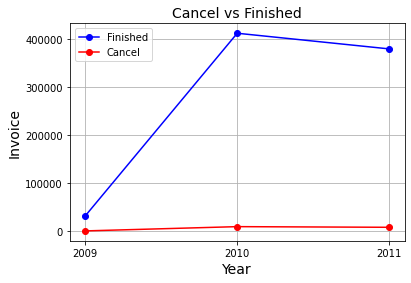

In [23]:
plt.plot(Count_Finished['Year'], Count_Finished['Invoice'], color='blue', marker='o', Label = 'Finished')
plt.plot(Count_Cancel['Year'], Count_Cancel['Invoice'], color='red', marker='o', Label ='Cancel')
plt.title('Cancel vs Finished', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Invoice', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

### Cancellation Rate

In [52]:
Cancellation_Rate =  Count_Cancel['Invoice']/df['Invoice'].count()*100
Cancellation = Count_Cancel.assign(Cancellation_Rate =  Count_Cancel['Invoice']/df['Invoice'].count()*100)

Cancellation[['Year', 'Cancellation_Rate']]

,Year,Cancellation_Rate
0,2009,0.095093
1,2010,0.929293
2,2011,0.801970


### Interpretation

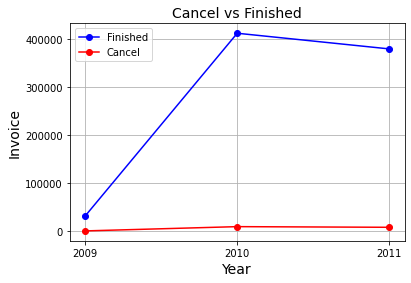

In [58]:
plt.plot(Count_Finished['Year'], Count_Finished['Invoice'], color='blue', marker='o', Label = 'Finished')
plt.plot(Count_Cancel['Year'], Count_Cancel['Invoice'], color='red', marker='o', Label ='Cancel')
plt.title('Cancel vs Finished', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Invoice', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

Berdasarkan grafik dan data diatas, didapatkan bahwa=
> Pada tahun 2009
1. Banyaknya transaksi yang berhasil yaitu 31.760 transaksi
2. Banyaknya gagal transaksi yaitu 1.015
3. Presetase gagal transaksi = 0.095%

> Pada tahun 2010
1. Banyaknya transaksi yang berhasil yaitu 412.624 transaksi
2. Banyaknya gagal transaksi yaitu 9919
3. Presetase gagal transaksi = 0.92%

>Pada tahun 2011
1. Banyaknya transaksi yang berhasil yaitu 379.980 transaksi
2. Banyaknya gagal transaksi yaitu 8560
3. Presetase gagal transaksi = 0.801%

> Dapat disimpulkan bahwa,
banyaknya gagal transaksi dan banyaknya transaksi yang berhasial dilakukan itu berbanding lurus.

